In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [13]:
models = [
    #("/local/scratch/clmn1/octree_study_new/Experiments/pesoLarge_OctreeNCA2DSegmentation/", "OctreeL"),
    #("/local/scratch/clmn1/octree_study_new/Experiments/peso_med_OctreeNCA2DSegmentation/", "MedNCA"),
    ("/local/scratch/clmn1/octree_study_new/Experiments/cholec_OctreeNCASegmentation", "OctreeNCA"),
    ("/local/scratch/clmn1/octree_study_new/Experiments/cholec_UNet_efficientnet-b0_0_MinUNetSegmentation/", "UNet Efficientnet"),
    ("/local/scratch/clmn1/octree_study_new/Experiments/cholec_UNet_mobilenet_v2_0_MinUNetSegmentation/", "UNet Mobilenetv2"),
    ("/local/scratch/clmn1/octree_study_new/Experiments/cholec_UNet_resnet18_0_MinUNetSegmentation/", "UNet Resnet18"),
    ("/local/scratch/clmn1/octree_study_new/Experiments/cholec_UNet_vgg11_0_MinUNetSegmentation/", "UNet VGG11"),
    ("/local/scratch/clmn1/octree_study_new/Experiments/cholec_unet_UNetSegmentation/", "UNet3D"),
]

In [27]:
annnotation_list = []
all_files = []
for i, (model, model_name) in enumerate(models):
    score = pd.read_csv(f"{model}/eval/standard.csv", sep='\t').loc[:, "DiceScore/0"].mean()
        


    mem_allocation = json.load(open(f"{model}/mem_allocation.json"))["byte"]
    num_params = json.load(open(f"{model}/num_params.json"))["num_params"]

    eval_file = {}

    eval_file["model"] = model
    eval_file["mem_allocation"] = mem_allocation
    eval_file["num_params"] = num_params
    eval_file["score"] = score
    df = pd.DataFrame(index=[i], data=eval_file)
    all_files.append(df)
    annnotation_list.append((num_params, score, model_name))

all_files = pd.concat(all_files)

In [16]:
all_files

,model,mem_allocation,num_params,score
0,/local/scratch/clmn1/octree_study_new/Experime...,25999760384,40620,0.592942
1,/local/scratch/clmn1/octree_study_new/Experime...,3287940608,6252049,0.731365
2,/local/scratch/clmn1/octree_study_new/Experime...,3026734080,6629525,0.696898
3,/local/scratch/clmn1/octree_study_new/Experime...,1889874944,14328789,0.695294
4,/local/scratch/clmn1/octree_study_new/Experime...,3020811264,18254613,0.727274
5,/local/scratch/clmn1/octree_study_new/Experime...,14993841152,19073285,0.523335


Text(0.5, 1.0, 'Cholec video segmentation')

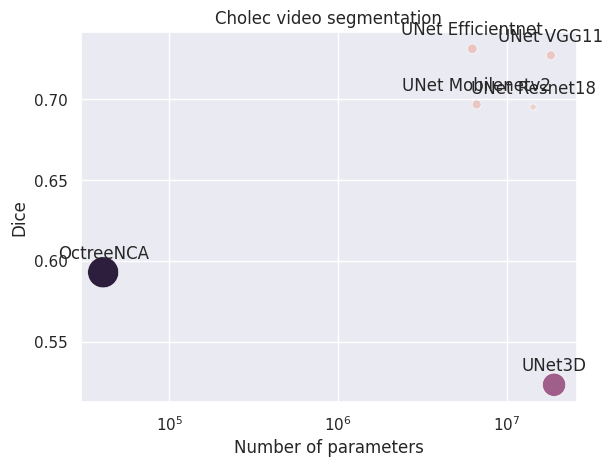

In [28]:
sns.set_theme()
ax = sns.scatterplot(data=all_files, x="num_params", y="score", hue="mem_allocation", size="mem_allocation",legend=False, sizes=(20, 500))
for x,y,txt in annnotation_list:
    ax.annotate(txt, (x,y), textcoords="offset points", xytext=(0,10), ha='center')
    pass
plt.xscale("log")
plt.xlabel("Number of parameters")
plt.ylabel("Dice")
plt.title("Cholec video segmentation")